**BenZvi Homework Problem**

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt('C:/Users/sanya/Downloads/pr-2d-pdf.txt')
x = data[:, 0]
y = data[:, 1]
sig_x = 1
sig_y = 2

def likelihood(x,y,sig_x,sig_y,a,b):
    likelihoods = []
    for x_i, y_i in zip(x, y):
        exp= -0.5*((y_i-a-(b*x_i))**2) / (sig_y**2+b**2*sig_x**2)
        norm= np.sqrt(2*np.pi*(sig_y**2+b**2*sig_x**2))
        likelihoods.append(np.exp(exp)/norm)
    return np.prod(likelihoods)

In [5]:
posterior[50]

array([2.04828738e-12, 2.26489867e-12, 2.49889248e-12, 2.75097898e-12,
       3.02181506e-12, 3.31199291e-12, 3.62202816e-12, 3.95234780e-12,
       4.30327792e-12, 4.67503151e-12, 5.06769649e-12, 5.48122411e-12,
       5.91541788e-12, 6.36992336e-12, 6.84421892e-12, 7.33760764e-12,
       7.84921067e-12, 8.37796214e-12, 8.92260586e-12, 9.48169393e-12,
       1.00535875e-11, 1.06364598e-11, 1.12283010e-11, 1.18269266e-11,
       1.24299866e-11, 1.30349788e-11, 1.36392631e-11, 1.42400787e-11,
       1.48345638e-11, 1.54197766e-11, 1.59927183e-11, 1.65503584e-11,
       1.70896601e-11, 1.76076077e-11, 1.81012343e-11, 1.85676497e-11,
       1.90040685e-11, 1.94078375e-11, 1.97764627e-11, 2.01076348e-11,
       2.03992533e-11, 2.06494487e-11, 2.08566023e-11, 2.10193637e-11,
       2.11366656e-11, 2.12077355e-11, 2.12321037e-11, 2.12096090e-11,
       2.11404002e-11, 2.10249347e-11, 2.08639731e-11, 2.06585711e-11,
       2.04100681e-11, 2.01200722e-11, 1.97904434e-11, 1.94232733e-11,
      

Part (a)

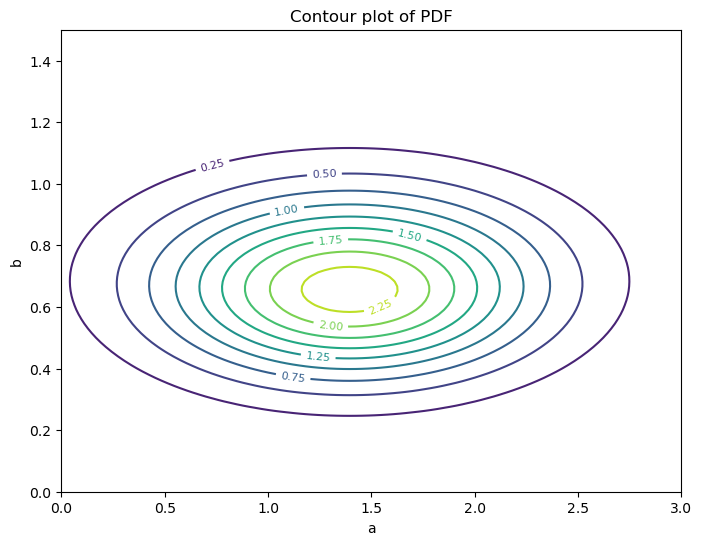

In [3]:
a_values = np.linspace(0, 3, 100)
b_values = np.linspace(0, 1.5, 100)
A, B = np.meshgrid(a_values, b_values)

posterior = np.zeros(A.shape)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        posterior[i, j] = likelihood(x, y, sig_x, sig_y, A[i, j], B[i, j])

plt.figure(figsize=(8, 6))
contour = plt.contour(A, B, posterior, levels=10)
plt.clabel(contour, inline=True, fontsize=8)
plt.xlabel('a')
plt.ylabel('b')
plt.title('Contour plot of PDF')
plt.show()

Part (b)

In [18]:
max_i = np.unravel_index(np.argmax(posterior), posterior.shape)
a=A[max_i]
b=B[max_i]
print(a,b)


1.393939393939394 0.6515151515151515


Part (c)

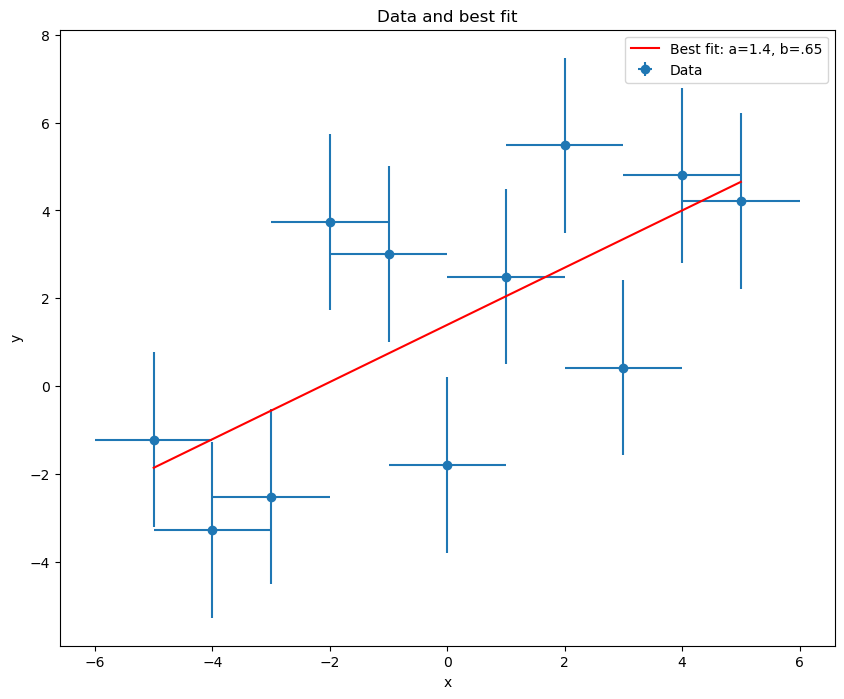

In [20]:
y_fit=a+b*x
plt.figure(figsize=(10, 8))
plt.errorbar(x,y,xerr=1,yerr=2,fmt='o',label='Data')
plt.plot(x, y_fit, label='Best fit: a=1.4, b=.65', color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Data and best fit')
plt.legend()